Reporte Tabular: Promedio de Montos por Distrito
      distrito       monto
0       Callao  237.759048
1  Desconocido  261.748982
2         Lima  256.564575
3   Miraflores  262.758874
4   San Isidro  264.531156
5        Surco  243.704379


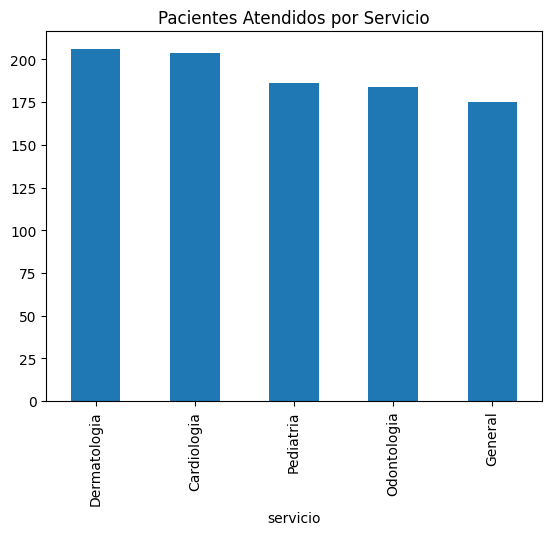

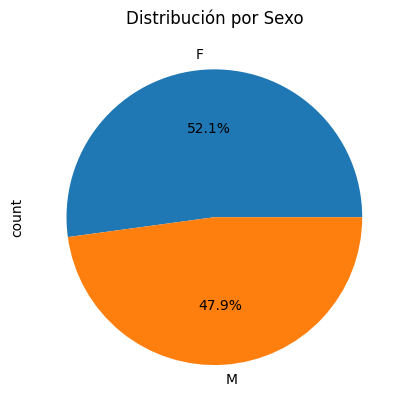

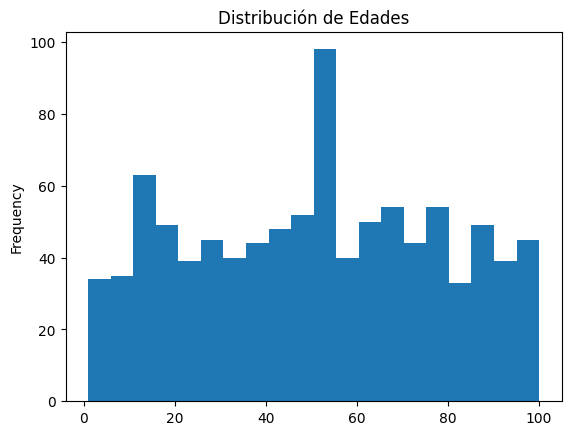

<Figure size 640x480 with 0 Axes>

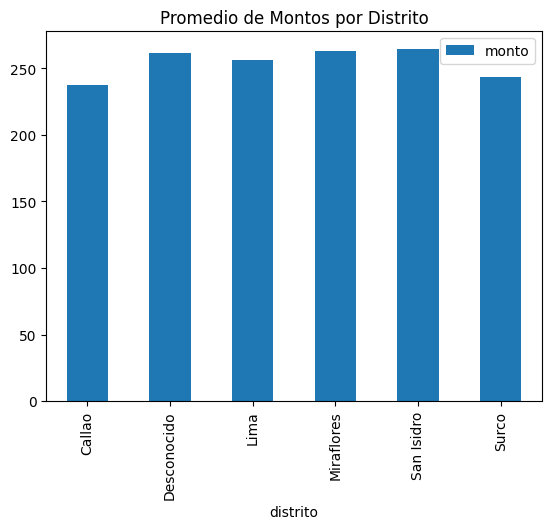

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')
db = client['SaludDigital_2025']
collection = db['pacientes']
data = list(collection.find())
df = pd.DataFrame(data)

# 1. Bar: Pacientes por servicio
plt.figure()
df['servicio'].value_counts().plot(kind='bar')
plt.title('Pacientes Atendidos por Servicio')
plt.savefig('reports/pacientes_atendidos_por_servicio.png')

# 2. Pie: Distribución sexo
plt.figure()
df['sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución por Sexo')
plt.savefig('reports/distribucion_por_sexo.png')

# 3. Hist: Edades
plt.figure()
df['edad'].plot(kind='hist', bins=20)
plt.title('Distribución de Edades')
plt.savefig('reports/distribucion_de_edades.png')

# 4. Tabular: Promedio montos por distrito (imprime y guarda CSV + bar opcional)
avg_monto = df.groupby('distrito')['monto'].mean().reset_index()
print("Reporte Tabular: Promedio de Montos por Distrito")
print(avg_monto)
avg_monto.to_csv('reports/promedio_de_montos_por_distrito.csv', index=False)
plt.figure()
avg_monto.plot(kind='bar', x='distrito', y='monto')
plt.title('Promedio de Montos por Distrito')
plt.savefig('reports/promedio_de_montos_por_distrito.png')